# Exercise sheet 2
---
**Machine Learning for Physics and Astronomy**

Semester 2, Period 5, 2021/2022

dr. Christoph Weniger, Andrea Visibile, Christiaan van Asperen, Dion Noordhuis, Kamile Lukosiute, Mathis Gerdes, Noemi Anau Montel, Silvia Cassanelli

To be handed in until **20/04/2022**

Total points: 18 (reduced exercise sheet length due to Easter)

---



## Chapter 3: Inference and Sampling

### 3.1 Metropolis Hastings (9 points)

*Topics: Multivariate normal, Metropolis Hastings and marginal distributions*

**Reading material: Murphy 24.3**

We will explore three different probability density functions, the first is 2-dim and bimodal, the other two are 10-dim and unimodal MVNs.



In [1]:
# provided

# The likelihood function is given

def pdf_bimodal(x):
    """Bimodal pdf"""
    sigma1 = 1.0
    sigma2 = 0.5
    pdf = 0.5/(2*np.pi*sigma1**2)*np.exp(-0.5*((x-1.5)**2).sum()/sigma1**2)  +  0.5/(2*np.pi*sigma2**2)*np.exp(-0.5*((x+1.0)**2).sum()/sigma2**2)
    return pdf

def pdf_10dim_c2(x):
    """10-dim MVN"""
    mu = np.zeros(10)
    corr = 0.2
    cov = np.eye(10, k = 0) + corr*np.eye(10, k = 1) + corr*np.eye(10, k = -1)
    pdf = scipy.stats.multivariate_normal.pdf(x, mu, cov)
    return pdf

def pdf_10dim_c5(x):
    """10-dim MVN with stronger correlations"""
    mu = np.zeros(10)
    corr = 0.5
    cov = np.eye(10, k = 0) + corr*np.eye(10, k = 1) + corr*np.eye(10, k = -1)
    pdf = scipy.stats.multivariate_normal.pdf(x, mu, cov)
    return pdf

1. Write your own Metropolish Hastings algorithm. (3 points) 

- The proposal distribution is supposed to be a $D=2$ or $D=10$ dimensional isotropic Gaussian with variance $\sigma^2$.
- Given some pdf, the algorithm should produce and return a given number of chain points $N$, starting with some initial vector $\mathbf{x}_0$. The result should be returned as a $N\times D$ array. 
- The algorithm should also evaluate and print the acceptance rate (fraction of accepted transitions over total number of steps).

Hints: Use `np.random.randn`, `np.random.rand`, `np.array` where appropriate. Write the algorithm such that it works for any dimensions of $\mathbf{x}_0$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats


def MetropolisHastings(pdf, N, x_init, sigma):
    samples = [x_init]
    num_accept = 0
    for i in range(N):
      candidate = np.random.normal(samples[-1], sigma)
      prob = min(1, pdf(candidate) / pdf(samples[-1]))
      if np.random.random() < prob:
        samples.append(candidate)
        num_accept +=1
      else:
        samples.append(samples[-1])
    
    acceptance_rate = num_accept/N
    return np.array(samples), acceptance_rate

N= 10000
prob = MetropolisHastings(pdf_bimodal, N, np.array([1,1]), 0.1)
acceptance_rate = prob[1]
print('acceptance rate:', acceptance_rate)

N= 10000
prob2 = MetropolisHastings(pdf_10dim_c2, N, np.array([1,1,1,1,1,1,1,1,1,1]), 0.1)
acceptance_rate2 = prob2[1]
print('acceptance rate:', acceptance_rate2)

N= 10000
prob3 = MetropolisHastings(pdf_10dim_c5, N, np.array([1,1,1,1,1,1,1,1,1,1]), 0.1)
acceptance_rate3 = prob3[1]
print('acceptance rate:', acceptance_rate3)

acceptance rate: 0.9176
acceptance rate: 0.8695
acceptance rate: 0.772


2. Explore the above bimodal distribution (first example). (2 points)
- Show resulting chain for $N=10000$ and for five proposal widths in the range $\sigma \in [0.01, 100.]$.  
- Based on the acceptance rate and visual inspection of the result, argue what parameters work here best.
- What are the problems with too low or too high values of $\sigma$?
- Also discuss what happens when you start with initial values far away from the optimum. This initial phase is called "burn in phase".

Hints: use `plt.scatter`

acceptance rate: 0.9964 with sigma 0.01


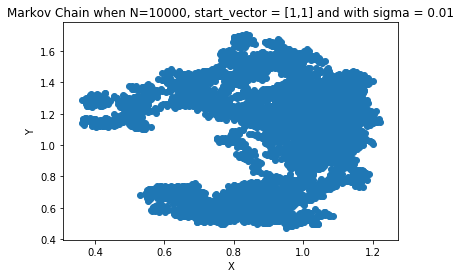

acceptance rate: 0.9438 with sigma 0.1


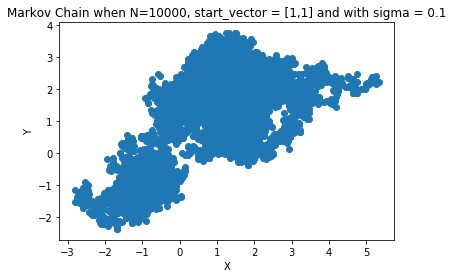

acceptance rate: 0.4434 with sigma 1.0


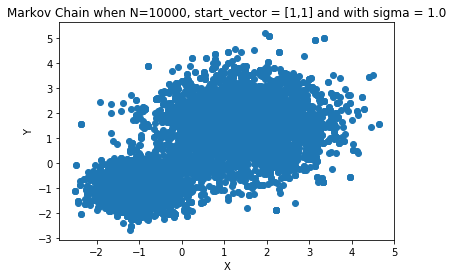

acceptance rate: 0.0177 with sigma 10.0


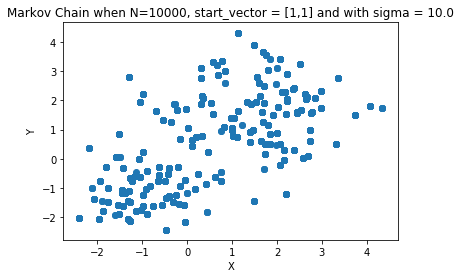

acceptance rate: 0.0001 with sigma 100.0


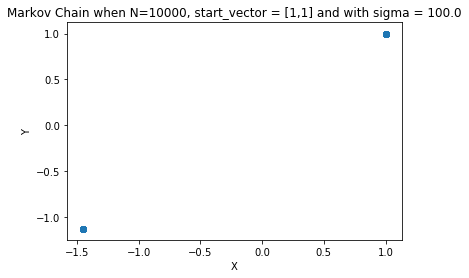

acceptance_rate 0.9616


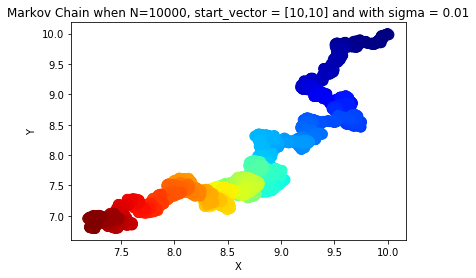

acceptance_rate 0.9374


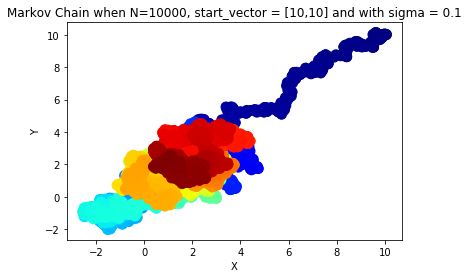

acceptance_rate 0.4392


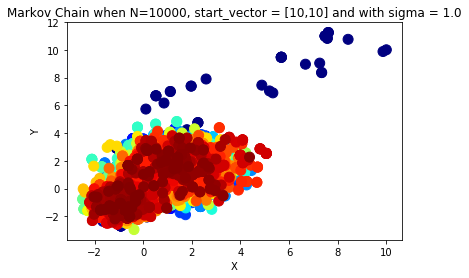

acceptance_rate 0.019


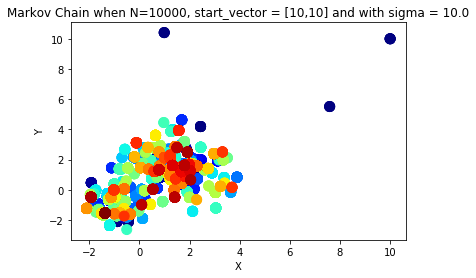

acceptance_rate 0.001


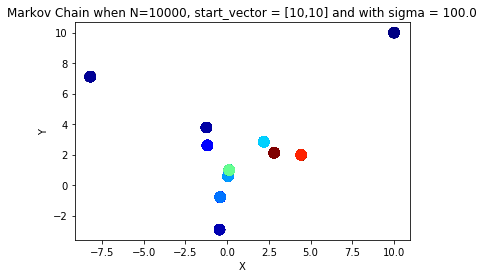

In [33]:
N= 10000

sigmas =  np.logspace(-2, 2, 5)


for sigma in sigmas:
  prob = MetropolisHastings(pdf_bimodal, N, np.array([1,1]), sigma)
  acceptance_rate = prob[1]
  print('acceptance rate:', acceptance_rate, 'with sigma', sigma)

  accepted_points = prob[0]
  plt.scatter(accepted_points[:,0],accepted_points[:,1])
  plt.title("Markov Chain when N=10000, start_vector = [1,1] and with sigma = {}".format(sigma))
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

for sigma in sigmas:
  prob = MetropolisHastings(pdf_bimodal, N, np.array([10,10]), sigma)
  acceptance_rate = prob[1]
  print('acceptance_rate',acceptance_rate)
  accepted_points = prob[0]
  t = np.arange(N+1)
  plt.scatter(accepted_points[:,0],accepted_points[:,1], c=t, cmap='jet',s=100)
  plt.title("Markov Chain when N=10000, start_vector = [10,10] and with sigma = {}".format(sigma))
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

**Based on the acceptance rate and visual inspection of the result, argue what parameters work here best.** The ideal σ looks like around 1 since we sample the whole range of the target distribution and we also have quite a good acceptance rate.

**What are the problems with too low or too high values of  σ ?**
With a too low σ we sample too much from the same space of the target distribution and for a too high σ we sample almost nothing.

**Also discuss what happens when you start with initial values far away from the optimum. This initial phase is called "burn in phase".**
In the last five graphs it can be seen what happens when you start away from the optimum. When sigma is 0.01 that the samples wont even reach the target distribution with 10000 samples (blue points are the first points in the markov chain and red the last). With the other sigmas the target distribution is reached by the Markov chain. The higher the sigma the smaller your burn in phase is, because you need less samples to reach the target distribution. A too large sigma will result in almost no samples, because the standard deviation is too large to sample consistenly from the target distribution.

3. Compare your results with the true distribution using 1-dim histograms (both in $x_1$ and $x_2$ direction) (2 points)

- Discuss qualitatively whether the true distribution can be recovered for reasonable values of $\sigma$.
- Again, what happens if $\sigma$ is too large or too small?  Is what you see supporting your observations in the previous question?

Note: you have to write your own marginal distributions for `pdf_bimodal`, projected either on `x1` or on `x2` (do these two marginals differ in our case?).

Hints: use `plt.hist` with 100 bins and `density = True`

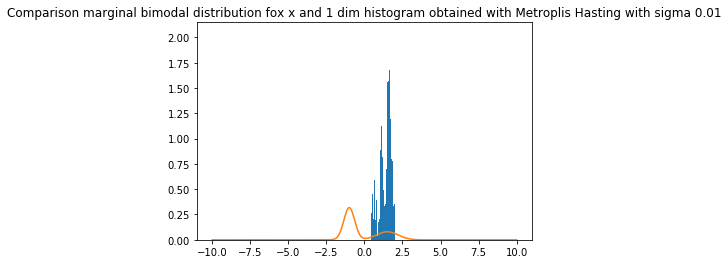

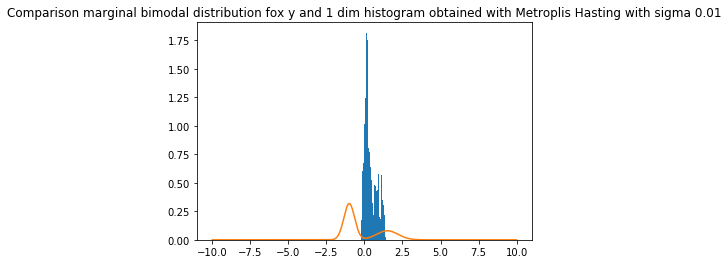

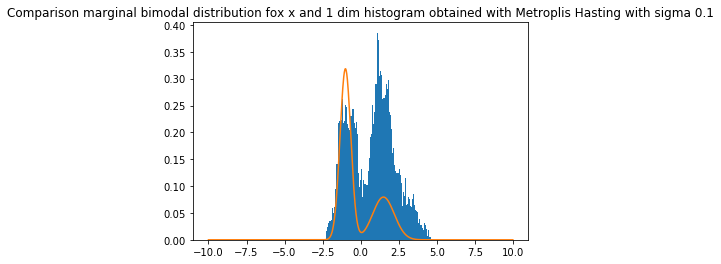

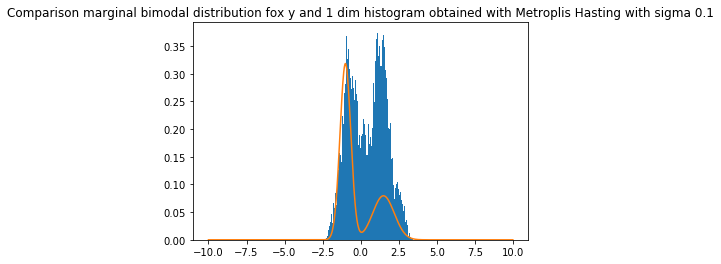

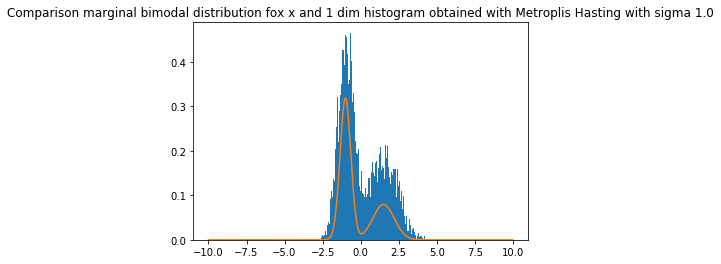

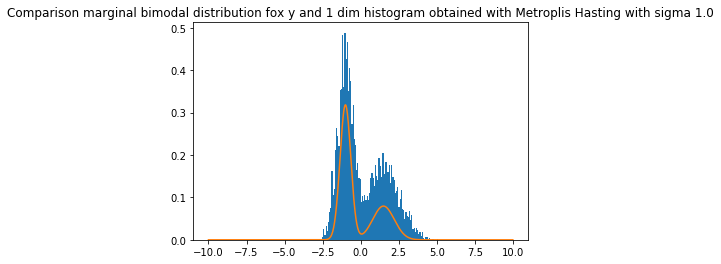

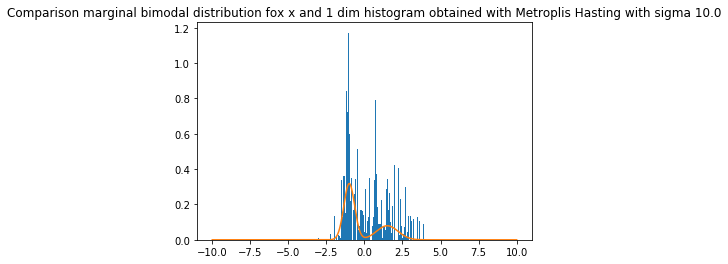

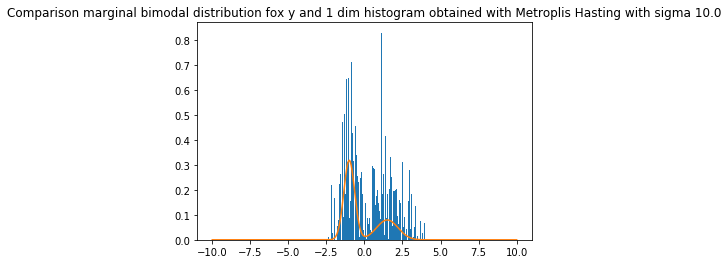

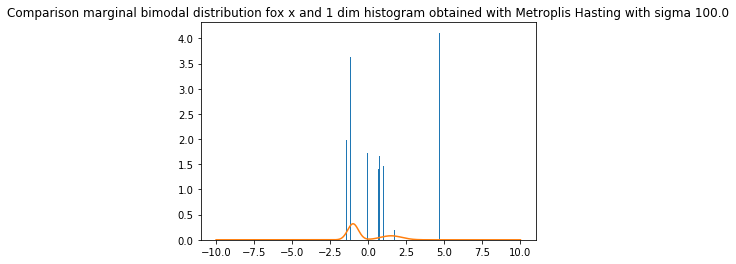

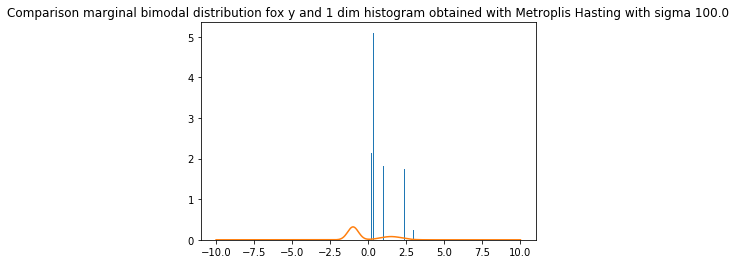

In [4]:
x =np.linspace(-10,10,1000)
dubble_x = np.concatenate((x, x))
dubble_x = dubble_x.reshape(2,len(x))

probs = []
for i in range(dubble_x.shape[1]):
  x_one_array = dubble_x[:,i]
  prob  = pdf_bimodal(x_one_array)
  probs.append(prob)

for sigma in sigmas:
  prob = MetropolisHastings(pdf_bimodal, N, np.array([1,1]), sigma)

  accepted_points = prob[0]
  plt.hist(accepted_points[:,0], bins=100, density=True)
  #sns.histplot(accepted_points[:,0], stat='probability')
  plt.plot(x,probs)
  plt.title("Comparison marginal bimodal distribution fox x and 1 dim histogram obtained with Metroplis Hasting with sigma {}".format(sigma))
  plt.show()

  plt.hist(accepted_points[:,1], bins=100, density=True)
  plt.plot(x,probs)
  plt.title("Comparison marginal bimodal distribution fox y and 1 dim histogram obtained with Metroplis Hasting with sigma {}".format(sigma))
  plt.show()




Discuss qualitatively whether the true distribution can be recovered for reasonable values of  σ.
Especially for sigma=1 we can sample quite good from the target pdf although the obtained distribution with the Metroplis-Hasting algorithm is not totally the same and a bit skewed to sample from the positive peak compared to the target pdf. \
Again, what happens if  σ  is too large or too small? Is what you see supporting your observations in the previous question? \
Yes we can see that for σ = 0.01 the samples do not look like he target distribution, since it mostly samples close to the start vector. For σ=100 we see that we almost get not samples since the candidate samples are mostly too far away from the actual target distribution.

4. Consider the 10-dim case. (2 point)
- Generate chains with 10000 steps, for initial values close to zero, and compare with the analytically expected result (a standard normal distribution).  
- Discuss why the acceptance rate is much lower than in the above 2-dim example, and why it becomes worse if the correlations become larger.

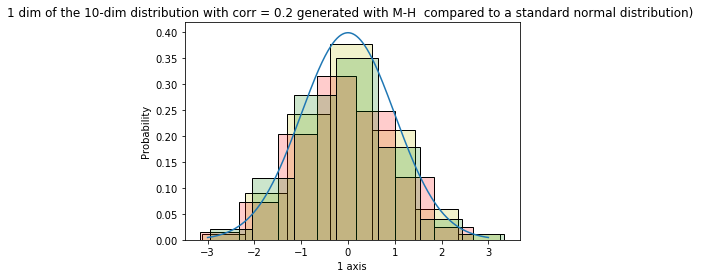

acceptance rate: 0.1283


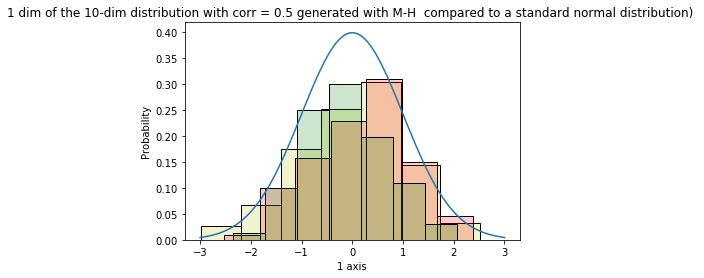

acceptance rate: 0.0329


In [37]:
from scipy.stats import norm
import seaborn as sns

x = np.linspace(-3,3,1000)
plt.plot(x, norm.pdf(x))

N= 10000
prob2 = MetropolisHastings(pdf_10dim_c2, N, np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]), 1)
#every dimensions distribution should by similar to the normal pdf since the target
#distribution is a multivariate normal distribution. So I have shown three different 
#dimensions to check if this is true
sns.histplot(prob2[0][:,0], stat='probability', bins=7, alpha=0.2, color='y')
sns.histplot(prob2[0][:,2], stat='probability', bins=7, alpha=0.2, color = 'r')
sns.histplot(prob2[0][:,4], stat='probability', bins=7, alpha=0.2, color = 'g')
plt.title('1 dim of the 10-dim distribution with corr = 0.2 generated with M-H  compared to a standard normal distribution) ')
plt.xlabel('1 axis')
plt.show()
acceptance_rate2 = prob2[1]
print('acceptance rate:', acceptance_rate2)

x = np.linspace(-3,3,1000)
plt.plot(x, norm.pdf(x))
N= 10000
prob3 = MetropolisHastings(pdf_10dim_c5, N, np.array([1,1,1,1,1,1,1,1,1,1]), 1)
sns.histplot(prob3[0][:,0], stat='probability', bins=7, alpha=0.2, color='y')
sns.histplot(prob3[0][:,2], stat='probability', bins=7, alpha=0.2, color = 'r')
sns.histplot(prob3[0][:,4], stat='probability', bins=7, alpha=0.2, color = 'g')
plt.title('1 dim of the 10-dim distribution with corr = 0.5 generated with M-H  compared to a standard normal distribution) ')
plt.xlabel('1 axis')
plt.show()
acceptance_rate3 = prob3[1]
print('acceptance rate:', acceptance_rate3)

Discuss why the acceptance rate is much lower than in the above 2-dim example, and why it becomes worse if the correlations become larger.

The accepetance rate of the bimodal 2-dim target distribution had an acceptance rate of 0.4322 with N=10000 and sigma=1, while the 10 dim target distribution with a correlation of 0.2 had an accepetance rate of 0.138 and when it had a correlation of 0.5 it had an accepetance rate of 0.0394. 

The reason that the acceptance rate for a 10-dim target distribution is lower than for the 2-dim distriubiton is because when you make a small diviation in 10 dim you are less likely to move into a higher probability area compared to the 2-dim case.

When the correlation is increased the acceptance rate decreased as shown above. When the correlation is increased of the target distribution is not even likely in any direction anymore and gets more likely areas in some direction while in other directions the distribution gets less likely. Since the direction the Markov Chain goes is random it becomes more important with a higher correlation that is goes in the direction of the more likelt area otherwise a lot of samples are getting rejected. In ten dimensions moving in the more likely direction is however not that likely. 


## Chapter 4: Regression (9 points) 


In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
#plt.style.use(['dark_background']) # if using dark background, easier to see the plots

$\newcommand{\bPhi}{\mathbf{\Phi}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bt}{\mathbf{t}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bm}{\mathbf{m}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bI}{\mathbf{I}}$

### 4.1  Polynomial Regression (5 points) 

*Topics: Unregularized regression, chi square statistic*

**Reading material: Murphy 7.2, 7.3; Bishop 3.1**

1. (1 points) $$\\ $$
Write a method `gen_sine(N)` that generates toy data like in the figure below. The method should have a parameter $N$, and should return $N$-dimensional vectors $\bx$ and $\bt$, where $\bx$ contains evenly spaced values from (0,1), and the elements $t_i$ of $\bt$ are distributed according to
$$t_i \sim \mathcal{N}(\mu_i, \sigma^2),$$
with the mean given by $\mu_i = \sin( 2 \pi x_i)$ and the standard deviation $\sigma=0.25$. Here $x_i$ is the $i$-th element of $\bf{x}$. You can make use of `np.random.normal()`.

Test your function by generating a plot similar to the one below:

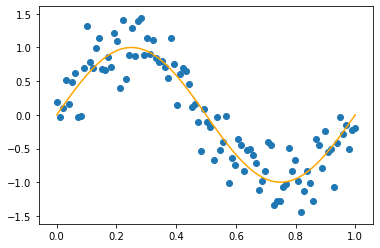

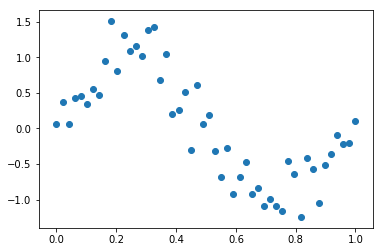

In [65]:
import numpy as np
import matplotlib.pyplot as plt
def gen_sine(n):
  t = np.random.normal(np.sin(2*np.pi*n),sigma)
  return t

#datapoints (N in slides)
sigma = 0.25
x = np.linspace(0,1,50)
t = gen_sine(x)
plt.scatter(x, t)


2. (2 points) $$\\ $$ Write a method `fit_polynomial(x, t, M)` that finds the exact solution of the maximum-likelihood of an _unregularized_ $M$-th order polynomial for some dataset `x` as explained in the lectures. The error function to minimize w.r.t. $\bw$ is:
$E(\bw) = \frac{1}{2} (\bPhi\bw - \bt)^T(\bPhi\bw - \bt)$,
where $\bPhi$ is the _feature matrix_ (or _design matrix_) as explained in the lecture (you can look at section 3.1.1 in Bishop or 7.3 in Murphy), and $\bt$ is the vector of target values. Your method should return a vector $\bw$ with the maximum-likelihood parameter estimates. As discussed in class, this has an analytical solution; this is the method you should use here.

As seen in the slides the analytical solution for the weights of the linear regression is :

$\vec{w}_{ML}=(\Phi^T\Phi)^{-1}\Phi^Tt$

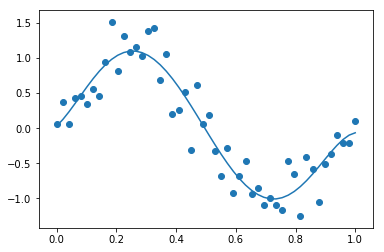

In [66]:
def fit_polynomial(x,t,M):
    #to make matrix of the points for all the different polynomials
    phi_T = []
    for i in range(M+1):
      poly = x**i
      phi_T.append(poly)
    
    #down the rows are the points
    #down the columns are the polynomials
    phi_T = np.array(phi_T)
    phi = phi_T.T

    W = np.dot(np.dot(np.linalg.inv(np.dot(phi_T, phi)),phi_T),t)    
    return W

#number of polynomials
M = 5

results = fit_polynomial(x, t, M)


import matplotlib.pyplot as plt

y = []
for i in range(len(results)):
  poly = results[i] * x**i
  y.append(poly)
y = np.array(y)
y = np.sum(y,0)

plt.plot(x, y)
plt.scatter(x, t)



3. (1 point) $$\\ $$ Sample a dataset with $N=50$, and fit four polynomials with $M \in (0,2,3,20)$. Plot the prediction function, along with the data and the original sine function. The resulting figures should look similar to the one provided below.
Make sure to save the $\bx$ and $\bt$ used in this exercise, as the "train" dataset.
Take a look at the optimal coefficients $\bw$ for these four cases and briefly comment their values as a function of M.


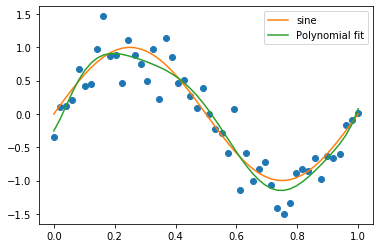

[0.02975684]
[ 0.95214463 -1.99434781  0.22209211]
[ -0.17456964  12.25039709 -35.75185694  23.9826327 ]
[ 1.62657611e-01  1.90856284e+01 -3.18802330e+02  2.73952368e+03
 -9.23655943e+03  3.24104045e+02  6.34285447e+04 -7.55930830e+04
 -2.79234932e+05  8.07313336e+05 -4.24180617e+05 -8.43502865e+05
  9.75231788e+05  7.68530838e+04  1.32613442e+05 -8.44517001e+05
 -5.02256572e+04  5.67760656e+05  4.89239017e+05 -8.93703584e+05
  3.04990505e+05]


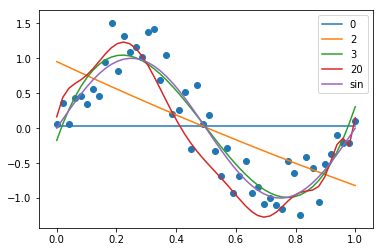

In [67]:
Ms = [0,2,3,20]
for M in Ms:

  results = fit_polynomial(x, t, M)

  y = []
  for i in range(len(results)):
    poly = results[i] * x**i
    y.append(poly)
  y = sum(y)
  plt.plot(x, y, label = M)
  print(results)

plt.scatter(x,t)
plt.plot(x, np.sin(2*np.pi*x), label='sin')
plt.legend()

Take a look at the optimal coefficients  w  for these four cases and briefly comment their values as a function of M.

What is clearly seen is that when the polynomial degree increases is that the magnitude of the coefficients gets a lot larger. This happens becuase the polynomials with a higher degree will become more fine tuned to the random noise of the target values.

4. (1 point) $$\\ $$  When fitting real data, it's important to always leave some data out for testing to make sure that your model is not overfitting. However, in this case, we can just generate more data to use as test data. Using your training data from the last exercise, fit polynomials with $M \in \text{range}(0,10)$. For each model, calculate the reduced chi-square statistic
$$
\chi_\nu^2 = \frac{\chi^2}{\nu},
$$
$$
\chi^2 = \sum_i \frac{(O_i - C_i)^2}{\sigma_i^2}.
$$
Additionally, generate 50 new observations from your $\sin(2\pi x_i)$ function and, using this as test data, calculate the **test** reduced chi-square statistic for each of your values of $M$.
Plot the training and test values of $\chi_\nu^2$ versus $M$ and briefly comment what you see.

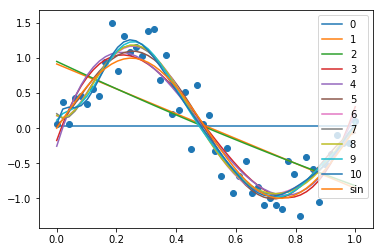

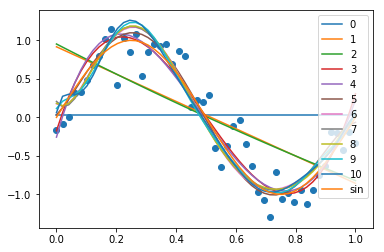

[9.404405314700051, 5.148590663355262, 5.250911352408072, 1.4376669102724546, 1.4495384180283364, 1.2346547834052959, 1.196054188933106, 1.2203248617883924, 1.2467967699123426, 1.247553866237288, 1.254794327859752]
[10.40500951550172, 5.227778807312037, 5.290789006863884, 1.2844921816335964, 1.330782712397702, 1.2955916071106057, 1.497663820310608, 1.4800963401121592, 1.4750674212720116, 1.5555637224635768, 1.6403555630574835]


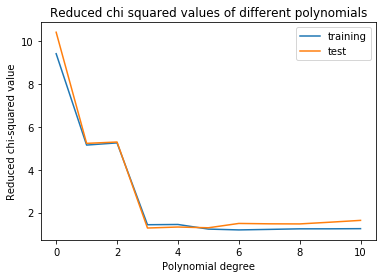

In [68]:
Ms = np.arange(0,11)
reduced_chi_squared_different_M1 = []
w_for_different_M = [] 
for M in Ms:
  results = fit_polynomial(x, t, M)
  w_for_different_M.append(results)

  y = []
  for i in range(len(results)):
    poly = results[i] * x**i
    y.append(poly)

  y = sum(y)
  plt.plot(x, y, label = M)

  chi_squared_total = []
  for i in range(len(t)):
    #n observations Oi, and predicted data Ci.
    chi_squared = ((t[i]-y[i])**2)/sigma**2
    chi_squared_total.append(chi_squared)
  
  #degrees of freedom number of observations (n) minus the number of fitted parameters (m)
  k= len(x) - M

  #reduced chi-square statistic
  reduced_chi_squared = sum(chi_squared_total)/k
  reduced_chi_squared_different_M1.append(reduced_chi_squared)

plt.scatter(x,t)
plt.plot(x, np.sin(2*np.pi*x), label='sin')
plt.legend()
plt.show()

#using the w that we obtained with the train data and use it on the test data
t2 = gen_sine(x)
plt.scatter(x, t2)

reduced_chi_squared_different_M2 = []
for i in range(len(w_for_different_M)):
  y = []
  for j in range(len(w_for_different_M[i])):
    poly = w_for_different_M[i][j] * x**j
    y.append(poly)

  y = sum(y)
  plt.plot(x, y, label = i)

  chi_squared_total = []
  for i in range(len(t2)):
    chi_squared = ((t2[i]-y[i])**2)/sigma**2
    chi_squared_total.append(chi_squared)
  
  #degrees of freedom number of observations (n) minus the number of fitted parameters (m)
  k= len(x) - M

  reduced_chi_squared = sum(chi_squared_total)/k
  reduced_chi_squared_different_M2.append(reduced_chi_squared)


plt.plot(x, np.sin(2*np.pi*x), label='sin')
plt.legend()
plt.show()

print(reduced_chi_squared_different_M1)
print(reduced_chi_squared_different_M2)
plt.plot(Ms , reduced_chi_squared_different_M1, label='training')
plt.plot(Ms , reduced_chi_squared_different_M2, label='test')
plt.title("Reduced chi squared values of different polynomials")
plt.xlabel("Polynomial degree")
plt.ylabel("Reduced chi-squared value")
plt.legend()


Plot the training and test values of  χ2ν  versus  M  and briefly comment what you see.

We see can see that for the training values we get a good fit with a polynoom of 3 degrees or higher which is not strange if you look at the shape of such a function. When we use the obtained weights of the the training data on the test data we get close to 1, but not as close as for the training test. The reduced chi squared can change since the points are generated randomly and therefore also the conclusion.

### 4.2 Regularized Regression (4 points) 

*Topics: Regularized regression*

**Reading Material: Ref: Murphy 7.5**

1. (2 points) $$\\ $$  Write a method that finds the regularized $M$-th order polynomial for some dataset $\bx$. Your method should include the regularizer weight $\lambda$ as a parameter and return a vector $\bw$ with the maximum-likelihood parameter estimates. 

In [69]:
def fit_polynomial2(x,t3,M,labda):

    #to make matrix of the points for all the different polynomials
    phi_T = []
    for i in range(M+1):
      poly = x**i
      phi_T.append(poly)
    
    #down the rows are the points
    #down the columns are the polynomials
    phi_T = np.array(phi_T)
    phi = phi_T.T

    W = np.dot(np.dot(np.linalg.inv(np.identity(M+1) * labda + np.dot(phi_T, phi)),phi_T),t3)

    y = []
    for i in range(len(W)):
      poly = W[i] * x**i
      y.append(poly)

    y = sum(y)  

    chi_squared_total = []
    for i in range(len(t3)):
      #chi_squared = ((y[i]-np.sin(2*np.pi*x[i]))**2)/sigma**2
      chi_squared = ((t3[i]-y[i])**2)/sigma**2
      chi_squared_total.append(chi_squared)

    #degrees of freedom number of observations (n) minus the number of fitted parameters (m)
    k= len(x) - M

    reduced_chi_squared = sum(chi_squared_total)/k

    return W, reduced_chi_squared

2. (1 point) $$\\ $$  Use your ``` gen_sine``` method to generate 10 datapoints, under the same conditions as before. Fit  polynomials of $M \in (0,2,3,9)$ for values $\lambda \in (0,10^{-5}, 10^{-3}, 10^{-2}, 100)$. Plot your results.

reduced chi-squared: 8.328425144153401 with labda 0 and 0 polynomials
[-0.10318957]


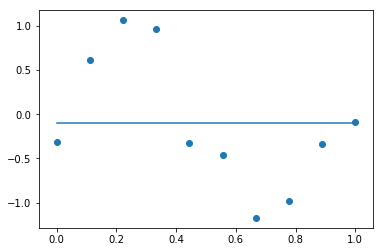

reduced chi-squared: 8.328425144153572 with labda 1e-05 and 0 polynomials
[-0.10318947]


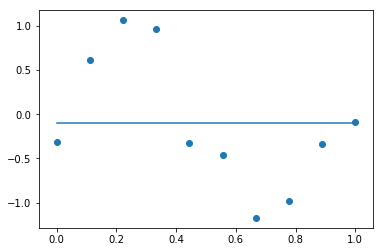

reduced chi-squared: 8.328425145856754 with labda 0.001 and 0 polynomials
[-0.10317926]


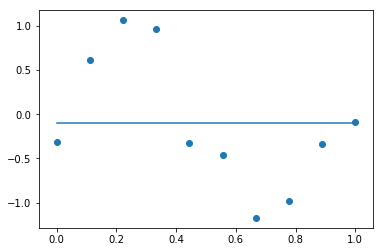

reduced chi-squared: 8.328425314182581 with labda 0.01 and 0 polynomials
[-0.10308649]


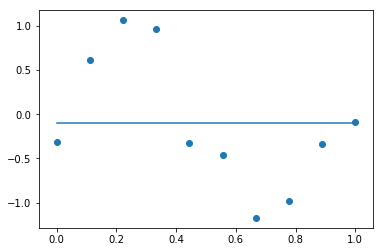

reduced chi-squared: 8.469226307914807 with labda 100 and 0 polynomials
[-0.00938087]


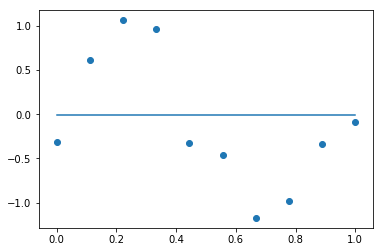

reduced chi-squared: 7.603167531375641 with labda 0 and 2 polynomials
[ 0.56164739 -1.72483391  0.56154312]


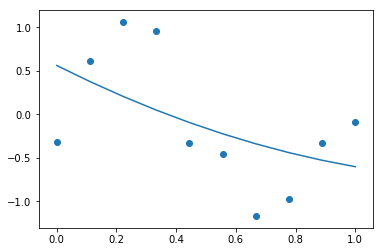

reduced chi-squared: 7.603167546118698 with labda 1e-05 and 2 polynomials
[ 0.56159338 -1.72451985  0.56124875]


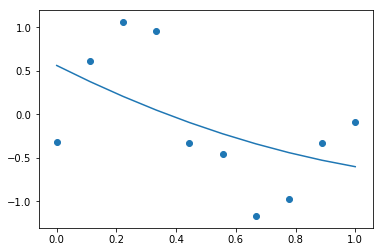

reduced chi-squared: 7.603307785841307 with labda 0.001 and 2 polynomials
[ 0.55637197 -1.69419959  0.53284533]


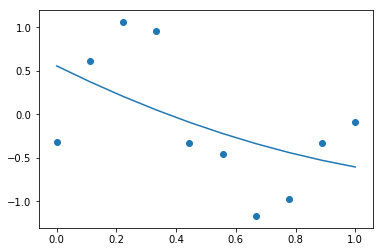

reduced chi-squared: 7.612538273776085 with labda 0.01 and 2 polynomials
[ 0.5180277  -1.47431577  0.32804313]


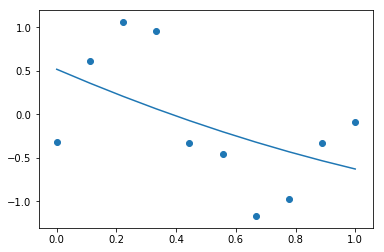

reduced chi-squared: 10.409639461935607 with labda 100 and 2 polynomials
[-0.00822211 -0.01565756 -0.01397632]


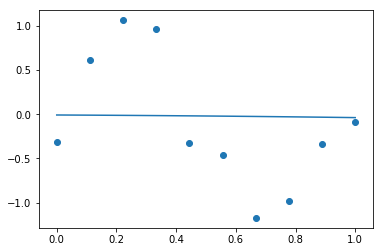

reduced chi-squared: 1.6734598400381604 with labda 0 and 3 polynomials
[ -0.23274592  11.35428459 -33.90945248  22.98066374]


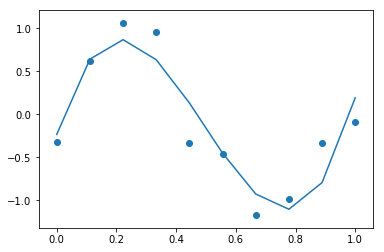

reduced chi-squared: 1.6737161329164618 with labda 1e-05 and 3 polynomials
[ -0.22711448  11.27042674 -33.69787956  22.84334313]


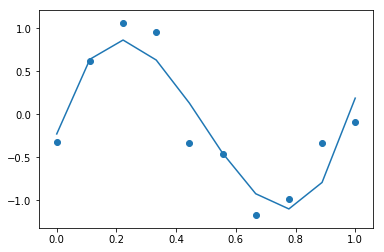

reduced chi-squared: 2.649871482367067 with labda 0.001 and 3 polynomials
[  0.11317152   6.18554793 -20.85188451  14.49946008]


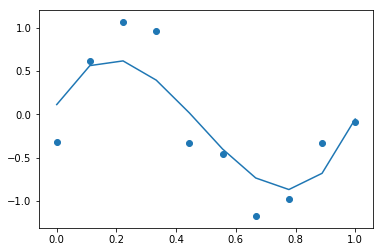

reduced chi-squared: 6.548748980609787 with labda 0.01 and 3 polynomials
[ 0.50883164 -0.05424105 -4.77821671  3.94493357]


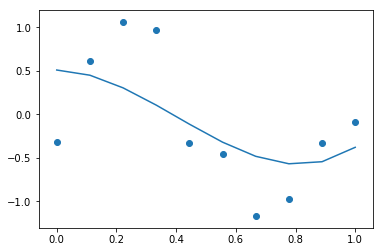

reduced chi-squared: 11.846604570899073 with labda 100 and 3 polynomials
[-0.00796563 -0.0154311  -0.01377496 -0.01081911]


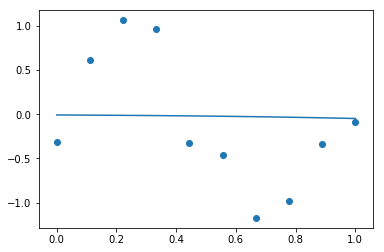

reduced chi-squared: 7.995603459436187e-07 with labda 0 and 9 polynomials
[-3.18134925e-01  2.22416159e+02 -4.94963783e+03  4.46727271e+04
 -2.10359412e+05  5.72213217e+05 -9.33023736e+05  8.99884061e+05
 -4.73102944e+05  1.04443540e+05]


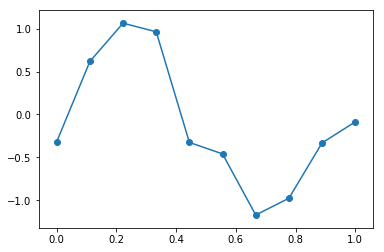

reduced chi-squared: 4.179760506974521 with labda 1e-05 and 9 polynomials
[ -0.33970208  12.79312208 -30.40762255  -2.59363985  18.57964431
  13.57502238   1.41359253  -5.8979354   -6.07810674  -1.13227975]


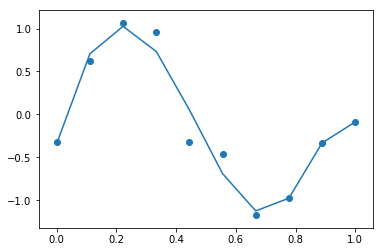

reduced chi-squared: 8.887594257730361 with labda 0.001 and 9 polynomials
[ -0.04538539   7.30337719 -15.6997251   -4.22191194   4.78728697
   7.72100963   6.41644891   2.77118873  -1.97116878  -7.0880158 ]


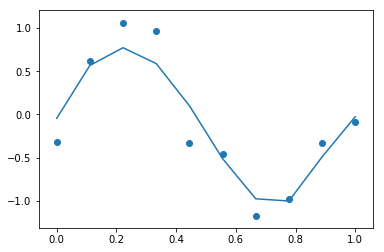

reduced chi-squared: 29.560121825949654 with labda 0.01 and 9 polynomials
[ 0.3368199   1.69676062 -4.69682118 -2.06414875  0.46580602  1.66994407
  1.80306931  1.26108735  0.34282697 -0.75736585]


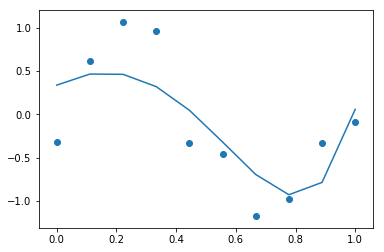

reduced chi-squared: 82.48949801536075 with labda 100 and 9 polynomials
[-0.00751439 -0.01499776 -0.01336684 -0.01043287 -0.0079609  -0.00610039
 -0.00473126 -0.00372127 -0.00296846 -0.00240015]


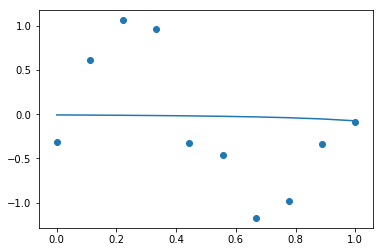

In [70]:
x2 = np.linspace(0,1,10)
t3 = gen_sine(x2)

#number of polynomials
Ms = [0,2,3,9]
labdas = [0, 10**-5, 10**-3,10**-2,100]

for M in Ms:
  for labda in labdas:
    results = fit_polynomial2(x2, t3, M,labda)
    #print('w:',results[0])
    print('reduced chi-squared:',results[1],'with labda',labda, 'and', M, 'polynomials')
    print(results[0])

    y = []
    for i in range(len(results[0])):
      poly = results[0][i] * x2**i
      y.append(poly)
    y = np.array(y)
    y = np.sum(y,0)

    plt.plot(x2, y)
    plt.scatter(x2, t3)
    plt.show()


3. (1 point) $$\\ $$  Discuss your results. What is the effect of $\lambda$ on the model? What is happening to the coefficents $\bw$ as you increase $\lambda$? Which value of $\lambda$ is most appropriate for the model $M=9$? Why?


With a polynoom of degree 0 it has no effect at all since that is just a straight line. With a polynoom of degree 2 it only has a notable effect when λ=100 and it increases the reduced chi suared value (and therefore underfits the polynoom). A polynoom of degree 3 already fits quite well, but when we a small λ of 10^-5 the fits gets even better. When we go to λ = 10^-3 the polynoom is already underfitted. The polynoom of degree 9 was highly overfitted without a value of lambda, but with a lambda of 1e-05  the polynoom was already underfitted. The λ of 10^-5 did give the best fit for the polynoom of degree 9, because this λ gave the reduced chi squared value that was closest to 1. (this degree of polynoom with only 10 points of data is already not that smart of an idea). The general effect of λ is that it underfits the polynoom and it decrease the coefficients w when you increase λ.